In [441]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [442]:
data = pd.read_csv('/Iris.csv')

In [443]:
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

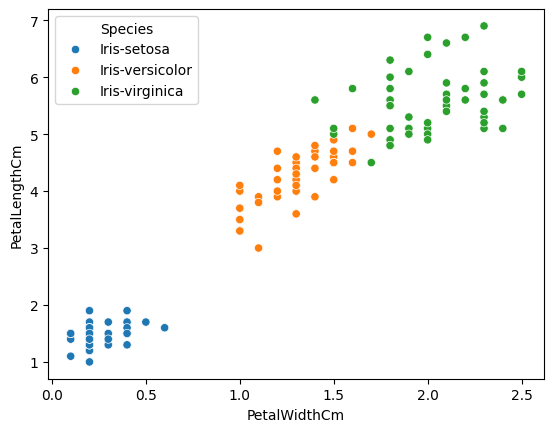

In [444]:
sns.scatterplot(data, x=data.PetalWidthCm, y=data.PetalLengthCm, hue=data.Species)

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

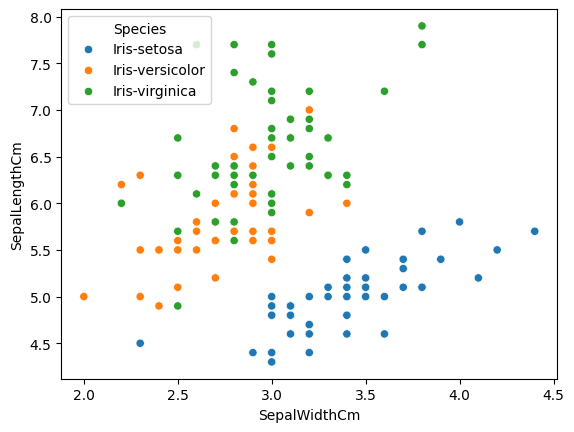

In [445]:
sns.scatterplot(data, x=data.SepalWidthCm, y=data.SepalLengthCm, hue=data.Species)

In [446]:
X = data.drop(['Species', 'Id'], axis=1)
y = data['Species'].values
print(X.head())
print(y[:5])

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [448]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [449]:
print(accuracy_score(y_test, y_pred))

1.0


# Neural network instead of KNN

In [450]:
import tensorflow as tf
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [451]:
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_train_one_hot = to_categorical(y_train_encoded)
y_test_encoded = LabelEncoder().fit_transform(y_test)
y_test_one_hot = to_categorical(y_test_encoded)

In [458]:
model = Sequential(layers=[
    Input(4),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')]
)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_one_hot, epochs=150, verbose=1)

Epoch 1/150
4/4 [==============================] - 1s 5ms/step - loss: 1.1033 - accuracy: 0.3780
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 0.9967 - accuracy: 0.5433
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.9325 - accuracy: 0.3622
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.8618 - accuracy: 0.6693
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8053 - accuracy: 0.6772
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.7543 - accuracy: 0.6772
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.7081 - accuracy: 0.7323
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.8110
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6261 - accuracy: 0.7559
Epoch 10/150
4/4 [==============================] - 0s 6ms/step - loss: 0.5927 - accuracy: 0.7953
Epoch 11/150
4/4 [===========

In [459]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

1/1 [==============================] - 0s 157ms/step - loss: 0.0621 - accuracy: 1.0000
